In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

**Importing The Dataset**

The Dataset we will use here to perform the analysis and build a predictive model is Bitcoin Price Data. We will use OHLC('Open','High','Low','Close') data from 17th July 2014 to 29th December 2022. Which is for 8 years for the Bitcoin Price.


In [ ]:
df = pd.read_csv("/content/bitcoin.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.shape

(2713, 7)

From this, We got to know that there are 2713 Rows of Data available and for each row, we have 7 different features or columns

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


**Data Pre-Procesing**:

From Here,We have to Perform the Data Pre-processing to check for null values, Removing the Outliers.

**Checking for Null Values**:


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


This Implies that there are no null values in the data set provided.

**Removing Outliers**:

In [ ]:
def identify_outliers_iqr(data):
    """Identifies outliers in a dataset using the Interquartile Range (IQR) method.

    Args:
        data (pd.Series): The data to analyze.

    Returns:
        pd.Index: The indices of the outliers.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)].index
    return outliers

    numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in numerical_cols:
        outliers = identify_outliers_iqr(df[col])
        df.drop(index=outlier_indices)

print("Outliers Removed.")

Outliers Removed.


Here,We have removed the outliers found in the Dataset Using Inter-Quartile Method(IQR).
Hence, The Data Preprocessing is done Successfully

**Exploratory Data Analysis**:

While Performing the EDA (Exporatory Data Analysis) of the Bitcoin Price Data. We will analyze how prices of the cryptocurrency have moved over the period of time and how the end of the quarters affects the price of the Currency

**Line Plot** :

Now,Let's create the Distribution Plot for the Continuous features given in the Dataset before moving further.Let's Check for the Null Values if any are present in the Data Frame

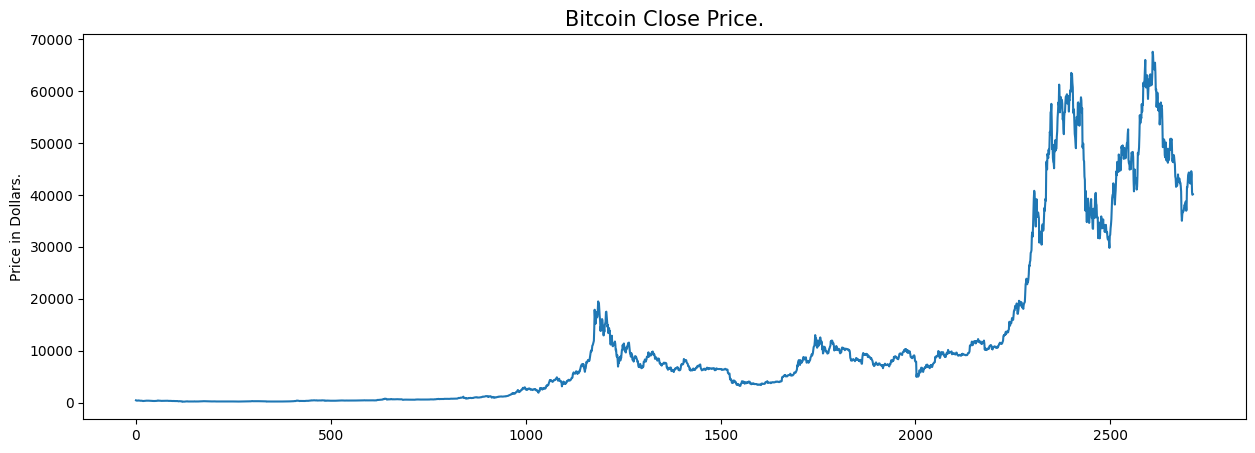

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(df['Close'])
plt.title('Bitcoin Close Price.', fontsize = 15)
plt.ylabel('Price in Dollars.')
plt.show()

The Prices of the Bitcoin Stocks are Showing an Upward Trend as Depicted by the plot of the closing price of the Stocks

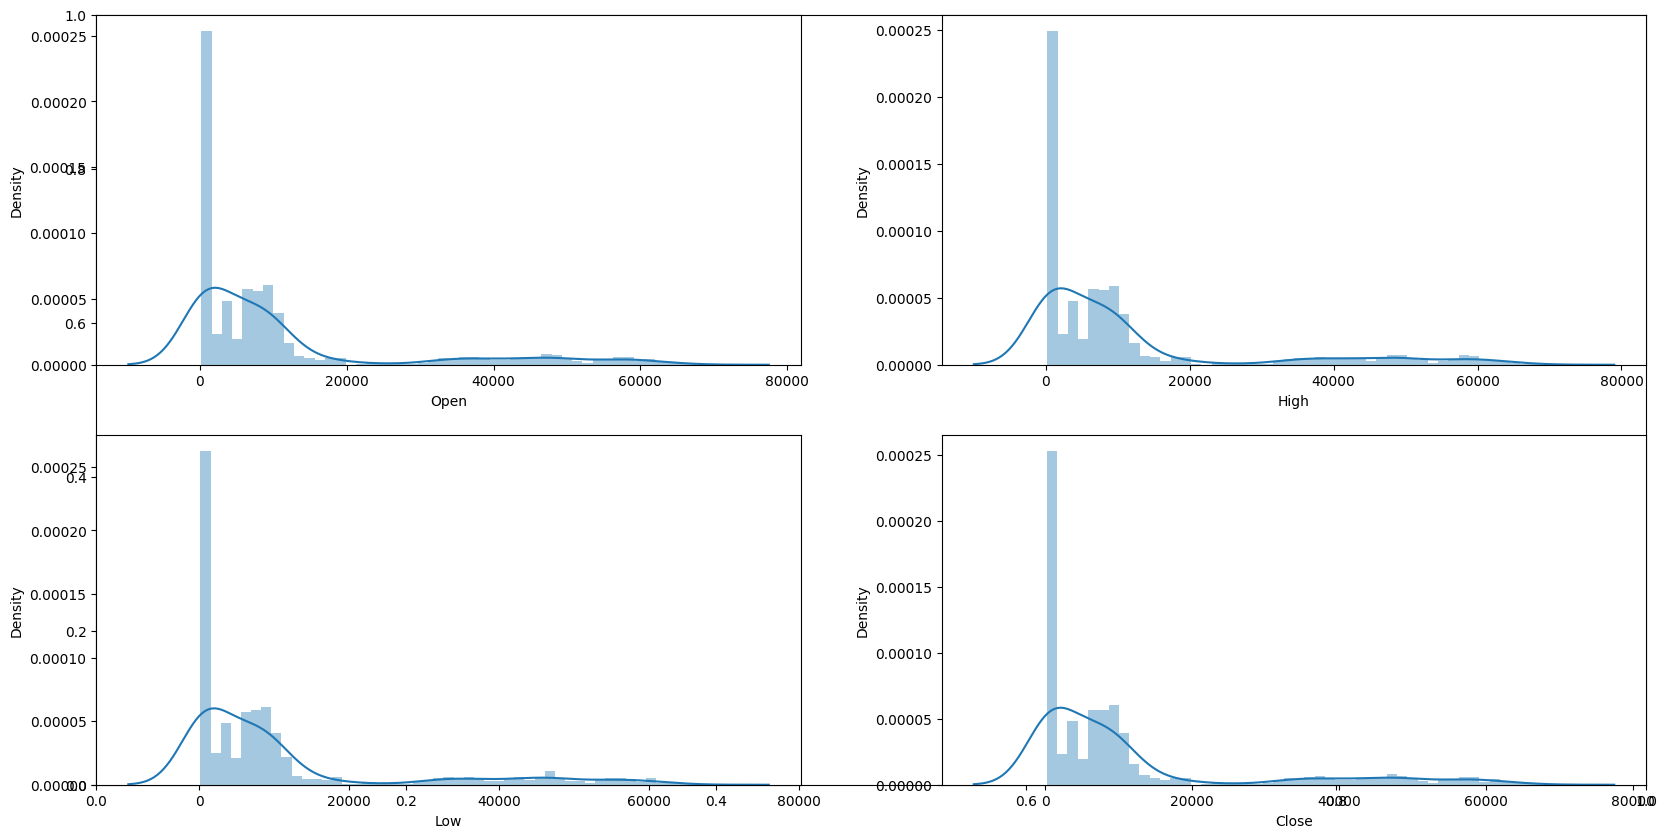

In [ ]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

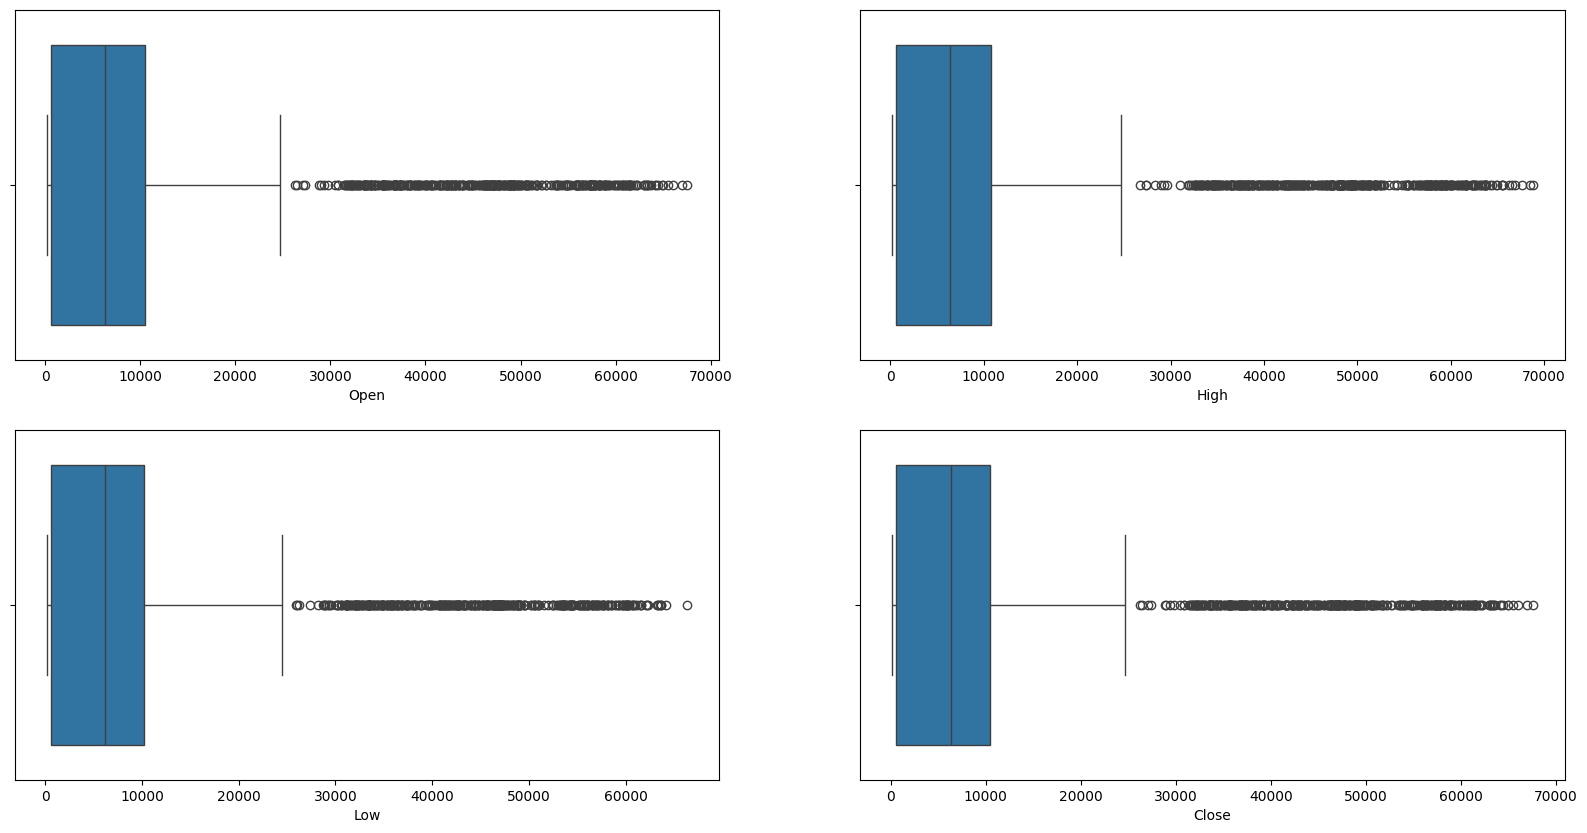

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, col in enumerate(features):
    row = i // 2
    col_index = i % 2
    sb.boxplot(x=df[col], ax=axes[row, col_index])
plt.show()

**Data Transformation**:
In Data Transformation, We have expanded the Date to three Columns ['Year','Month','Year'].

In [ ]:
splitted = df['Date'].str.split('-', expand = True)
df['Year'] = splitted[0].astype('int')
df['Month'] = splitted[1].astype('int')
df['Day'] = splitted[2].astype('int')

df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


Now,We have three more columns namely 'day','Month'and 'Year' all these three

**Data Integration**:

In [ ]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2713, 7), (2713, 7))

From Here, We can Conclude that all the rows and columns 'Close' and 'Adj Close' have the same data.So, having Redundant data in the Dataset is not going to help so, We'll drop this column before further analysis

In [ ]:
df = df.drop(['Adj Close'], axis = 1)

In [ ]:
df["is_quarter_end"] = np.where(df['Month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


We have Added Some more Columns which will help in the training of our Model. We have added the target feature which is a signal whether to buy or not,We will train our Model to predict this Only.

In [ ]:
df['open - close'] = df['Open'] - df['Close']
df['low - high'] = (df['Low'] - df['High'])
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

This program prepares Bitcoin price data to predict if the price will go up or down tomorrow. It does this by creating new data points that show daily price changes and then labeling each day as a "buy" (price up) or "not buy" (price down or same) based on the next day's price.

Let's Check whether the Target is Balanced or Not Using using a Pie Chart


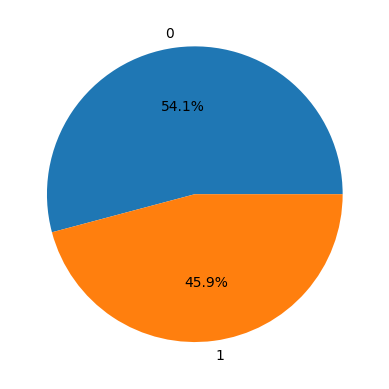

In [ ]:
plt.pie(df['target'].value_counts().values,labels = [0,1], autopct = '%1.1f%%')
plt.show()

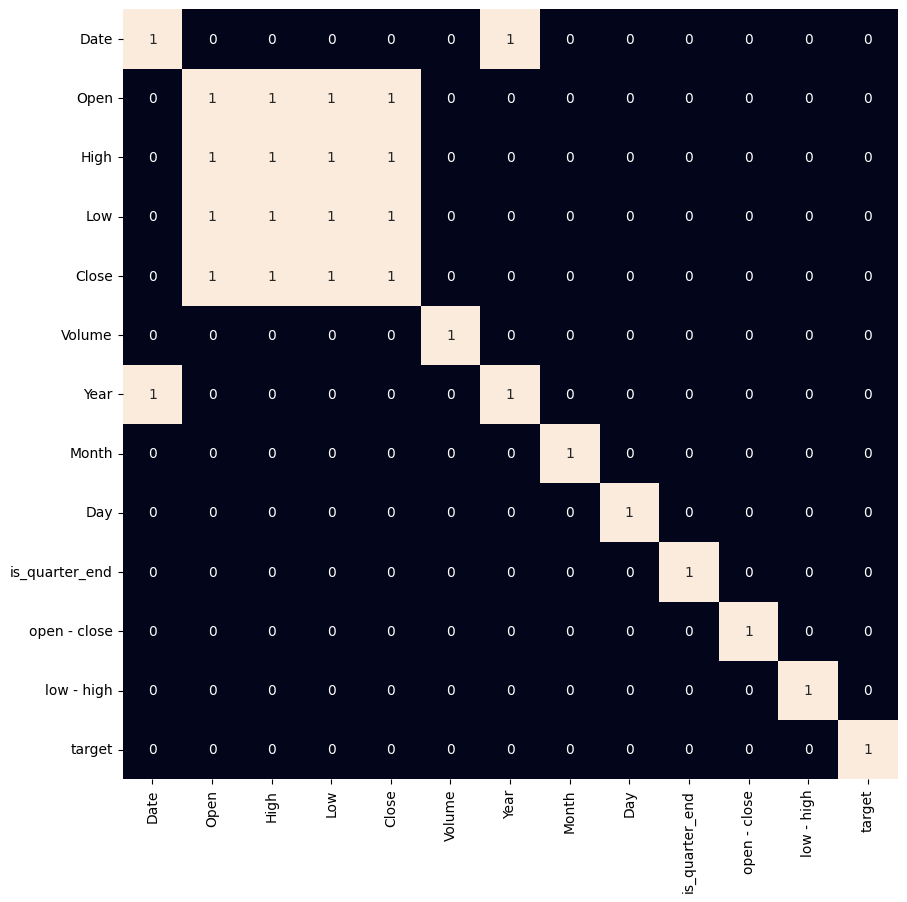

In [ ]:
plt.figure(figsize = (10,10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC which is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [39]:
features = df[['open - close', 'low - high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size = 0.1, random_state = 2022)
print(X_train.shape, X_valid.shape)

(2441, 3) (272, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

**Model Explanation and Implementaion**:

In [41]:
models = [LogisticRegression(),SVC(kernel = 'poly', probability = True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ',metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy :',metrics.roc_auc_score(Y_valid,models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5272712493564907
Validation Accuracy : 0.5187429004165088

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4828745224483161
Validation Accuracy : 0.5278844593498134

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Ac

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

**Model Evaluation**

In [49]:
from sklearn.metrics import confusion_matrix

In [52]:
y_pred = models[0].predict(X_valid)

In [53]:
cm = confusion_matrix(Y_valid, y_pred)

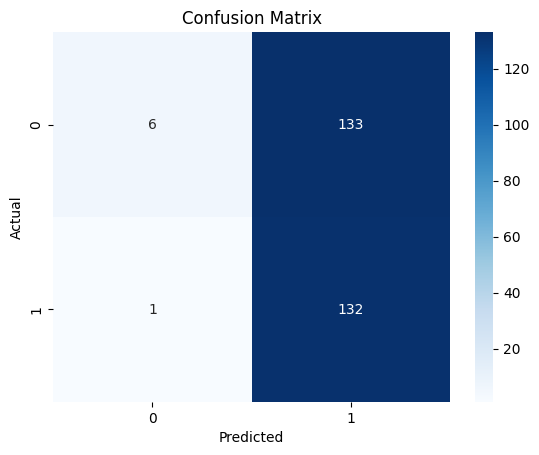

In [55]:
sb.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We Use Heatmap to Display th Confusion Matrix for the Model Evaluation of the Bitcoin Price Prediction.